In [57]:
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

Exploración de datos:

- Nicolás Ruiz 

- Valeria Caro

- Santiago Tinjacá

# Exploración de datos

## Cuantificación de imágenes

In [44]:
cantidad_clasificacion = len(os.listdir('data/classification/images'))

f'Cantidad de imagenes para clasificación: {cantidad_clasificacion}'

'Cantidad de imagenes para clasificación: 10015'

In [45]:
cantidad_segmentacion = len(os.listdir('data/segmentation/images'))

f'Cantidad de imagenes para segmentación: {cantidad_segmentacion}'

'Cantidad de imagenes para segmentación: 1000'

In [46]:
labels = pd.read_csv('data/classification/labels.csv')

count = round((labels[['MEL','NV','BCC','AKIEC','BKL','DF','VASC']].sum()/ labels.shape[0]) * 100, 2)
count

MEL      11.11
NV       66.95
BCC       5.13
AKIEC     3.27
BKL      10.97
DF        1.15
VASC      1.42
dtype: float64

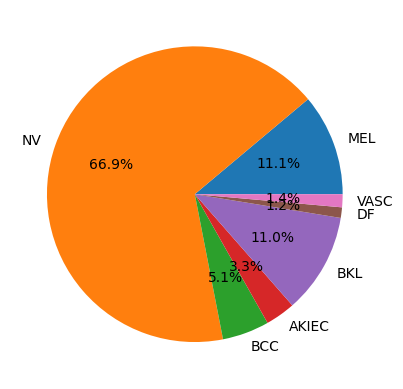

In [64]:
plt.pie(count, labels= ['MEL','NV','BCC','AKIEC','BKL','DF','VASC'], autopct='%1.1f%%')
plt.show()

Como se puede apreciar el dataset no se encuentra balanceado, pues hay muchas clases poco representadas en el datase con menos del 2% de representación. Por lo que los modelos podrían generar sesgos al clasificar estos labels. Además el modelo de NV está sobrerepresentado con casi 67% de representación en el dataset.

# Calidad del dataset

In [48]:
set(labels['image']).difference(set(x.replace('.jpg', '') for x in os.listdir('data/classification/images'))), set(x.replace('.jpg', '') for x in os.listdir('data/classification/images')).difference(set(labels['image']))

(set(), set())

Como se puede apreciar, las imagenes en el dataset de clasificación y en el archivo de labels son exactamente las mismas ya que ambos conjuntos son subconjuntos del otro, lo que significa que son el mismo conjunto.

In [49]:
s1 = set(x.replace('.jpg', '') for x in os.listdir('data/segmentation/images'))
s2 = set(x.replace('_segmentation.png', '') for x in os.listdir('data/segmentation/masks'))

s1.difference(s2), s2.difference(s1)

(set(), set())

De igual forma, las imagenes de segmentación son exactamente iguales a las máscaras, por lo que existe una relación uno a uno entre las imagenes y no hay ninguna imágen sin máscara o alguna máscara sin imagen.

# Ejemplos del dataset

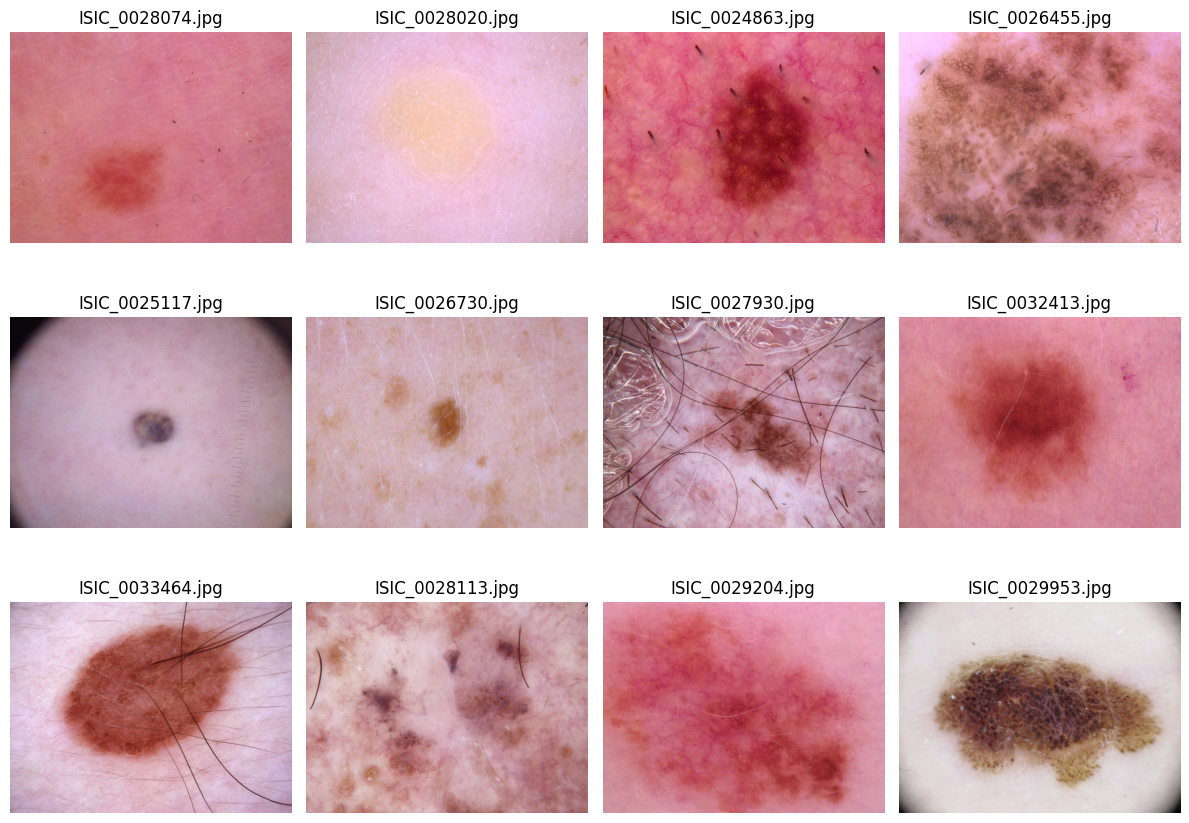

In [60]:
dataset_path = "data/classification/images"

imagenes = [os.path.join(dataset_path, img) for img in os.listdir(dataset_path) if img.endswith((".jpg", ".png"))]

rows, cols = 3, 4
sample_images = random.sample(imagenes, rows * cols)  

fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3)) 

for ax, img_path in zip(axes.flatten(), sample_images):
    img = cv2.imread(img_path)  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    ax.imshow(img)
    ax.set_title(os.path.basename(img_path))  
    ax.axis("off")  

plt.tight_layout()
plt.show()

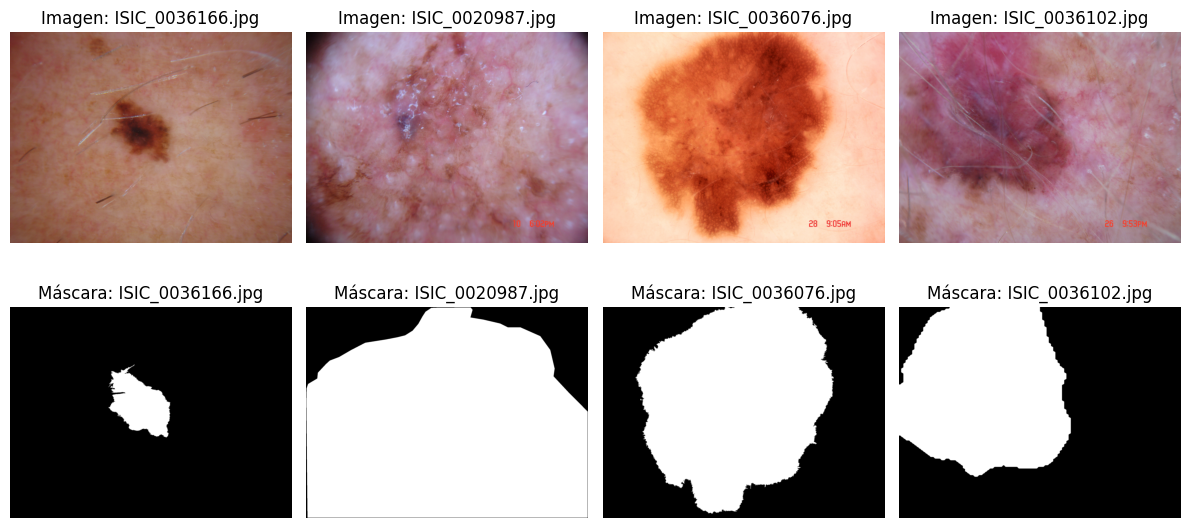

In [63]:
import os
import random
import matplotlib.pyplot as plt
import cv2

images_path = "data/segmentation/images"
masks_path = "data/segmentation/masks"

imagenes = [img for img in os.listdir(images_path) if img.endswith(".jpg")]

num_pairs = 4 
sample_images = random.sample(imagenes, num_pairs)

fig, axes = plt.subplots(2, num_pairs, figsize=(num_pairs * 3, 6))

for i, img_name in enumerate(sample_images):
    img_path = os.path.join(images_path, img_name)
    mask_path = os.path.join(masks_path, img_name.replace(".jpg", "_segmentation.png"))

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  

    axes[0, i].imshow(img)
    axes[0, i].set_title(f"Imagen: {img_name}")
    axes[0, i].axis("off")

    axes[1, i].imshow(mask, cmap="gray")
    axes[1, i].set_title(f"Máscara: {img_name}")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()
